Todo: pořešit jednotu zápisů.

In [3]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [5]:
df = pd.read_parquet(os.path.join("data","cnb_vyber.parquet"))
df = df.explode('008')
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [6]:
df = df.dropna(subset=['245_a','100_a','rok'])

In [76]:
df = df.explode('260_b').explode('264_b')

In [78]:
def dvoje_nakladatelstvi(sedesat, sedesatctyri):
    if sedesat != None:
        return sedesat.replace(',','').replace(":",'').strip()
    elif sedesatctyri != None:
        return sedesatctyri.replace(',','').replace(":",'').strip()
    else:
        return None

In [82]:
df['nakladatel'] = df.apply(lambda row: dvoje_nakladatelstvi(row['260_b'], row['264_b']), axis=1)

In [58]:
df['nakladatel'].sample(50)

001
cpk20031199626                             F. Šimáček
cpk20193123369                                   None
nkc20193112389                                   None
nkc20172883527                                   None
bk195401587                                     Orbis
nkc20203166293                                   None
ck9205881                  Evangelické nakladatelství
bk193203845       Ústřední rada církve československé
bk196803389                              Mladá fronta
bk193102480                Městská plynárna a vodárna
bk196101490                                       SPN
nkc20142568829                                 Dialog
bk192901431                                Melantrich
bk196200993                                       SPN
nkc20122427337           Literární klub Petra Bezruče
nkc20122359534                                   None
bk193002248                                    Pokrok
bk192701824                                      None
cpk19980528030          

## Nejproduktivnější nakladatelství

In [84]:
df.groupby('nakladatel').size().nlargest(20)

nakladatel
SPN                          22748
SNTL                         13404
MOBA                          9224
Mladá fronta                  8012
Albatros                      7876
Československý spisovatel     6187
Grada                         5998
Orbis                         5694
Práce                         5611
Naše vojsko                   5322
ČVUT                          5123
Knižní klub                   5034
Dilia                         4639
Ikar                          4548
Ivo Železný                   4452
Fragment                      4241
nákladem vlastním             4200
Odeon                         4134
Academia                      3976
Svoboda                       3975
dtype: int64

In [86]:
df[df['rok'] > 2013].groupby('nakladatel').size().nlargest(60)

nakladatel
MOBA                                           3705
Euromedia Group                                2541
Dobrovský s.r.o.                               2427
Fragment                                       2002
Argo                                           1896
Albatros                                       1880
CPress                                         1880
Ikar                                           1645
Mladá fronta                                   1323
Host                                           1298
Grada                                          1225
Svojtka & Co.                                  1207
Portál                                         1183
Knižní klub                                    1156
Grada Publishing                               1004
Nová Forma                                      976
Univerzita Palackého v Olomouci                 913
Wolters Kluwer                                  887
Academia                                        858
B

## Počet jednotlivých nakladatelství

<Axes: xlabel='rok'>

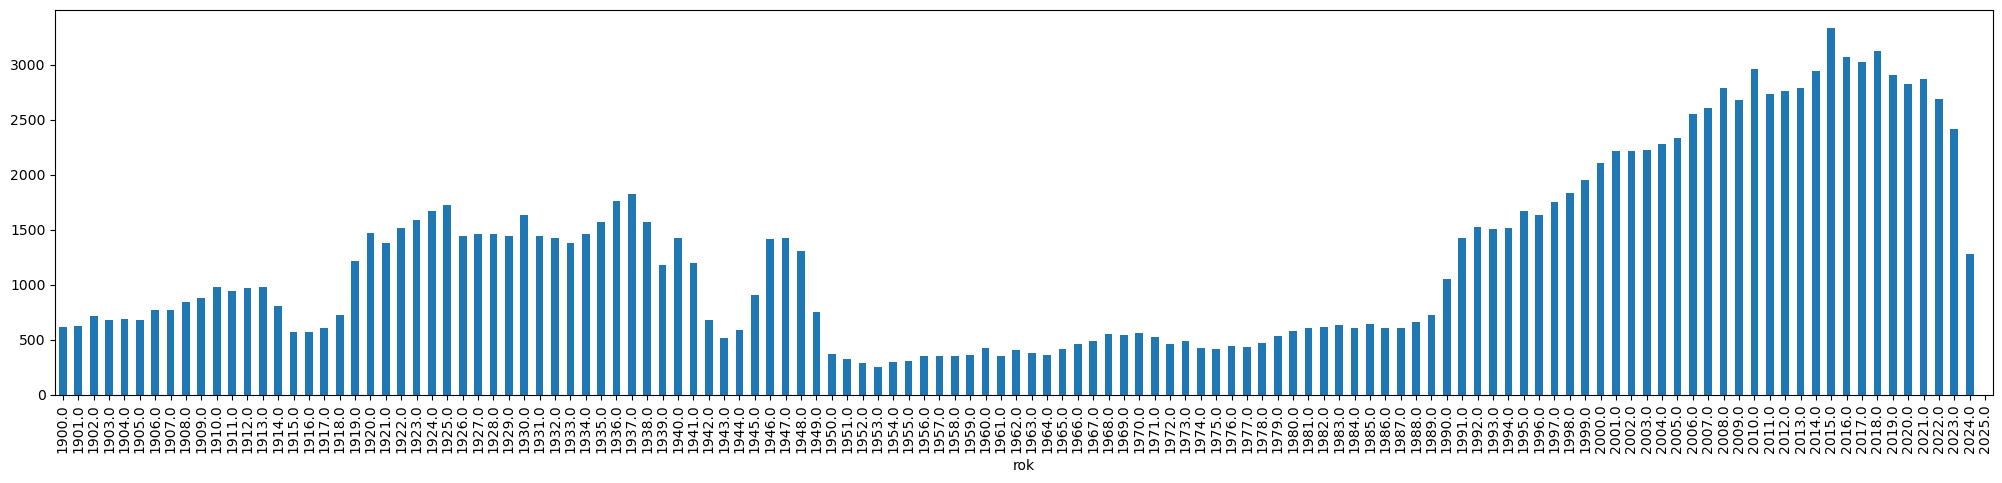

In [90]:
df.groupby('rok')['nakladatel'].nunique().plot.bar(figsize=(25,5))

In [110]:
df[df['rok'] == 1953].groupby('nakladatel').size().nlargest(15)

nakladatel
SPN                                           608
SNTL                                          335
Orbis                                         315
Práce                                         199
Československý spisovatel                     173
Naše vojsko                                   149
SZN                                           140
Nakladatelství Československé akademie věd    127
SNDK                                          126
Státní pedagogické nakladatelství             126
SNKLHU                                        123
ČDLJ                                          120
SZdN                                           97
Mladá fronta                                   87
SNPL                                           82
dtype: int64

## Počet nových nakladatelství

<Axes: xlabel='rok'>

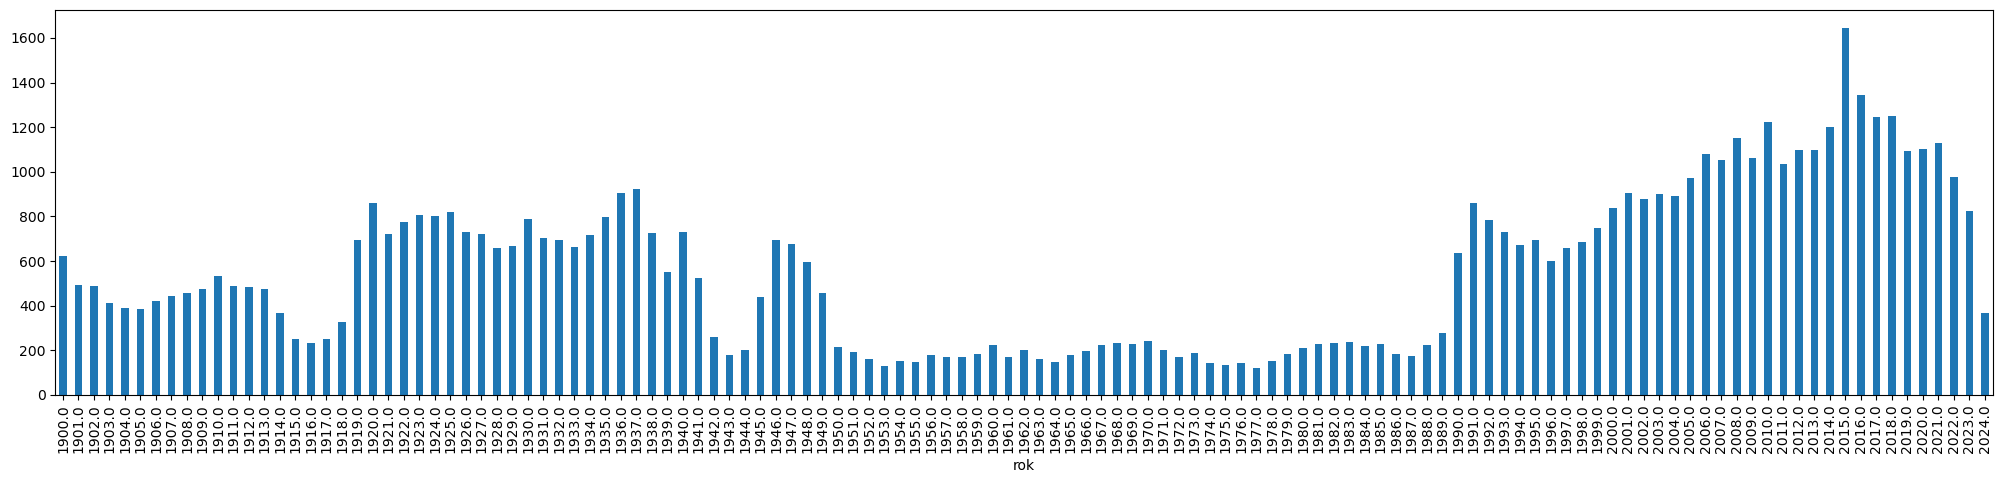

In [102]:
pd.DataFrame(df.groupby('nakladatel')['rok'].min()).groupby('rok').size().plot.bar(figsize=(25,5))

## Počet končících nakladatelství

<Axes: xlabel='rok'>

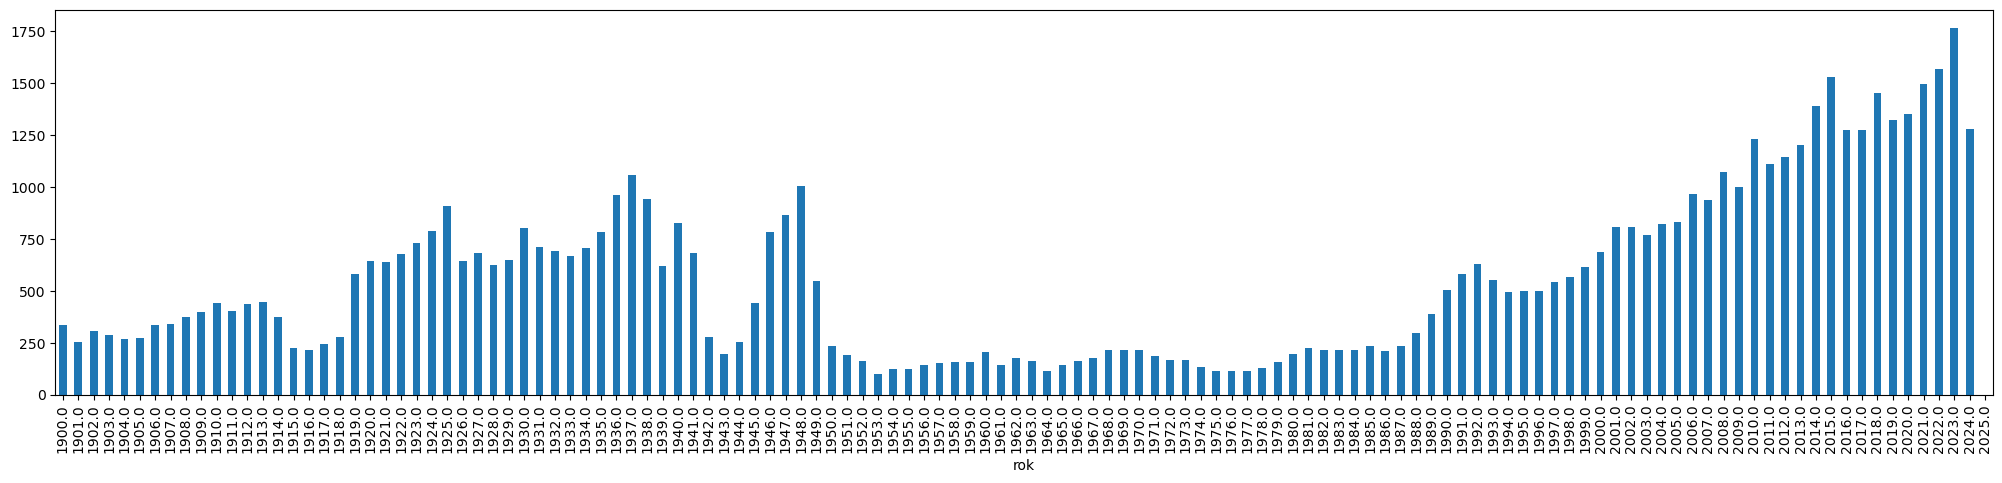

In [100]:
pd.DataFrame(df.groupby('nakladatel')['rok'].max()).groupby('rok').size().plot.bar(figsize=(25,5))

In [113]:
pd.DataFrame(df.groupby('nakladatel')['rok'].max()).groupby('rok').size()

rok
1900.0     338
1901.0     255
1902.0     306
1903.0     290
1904.0     269
1905.0     273
1906.0     335
1907.0     343
1908.0     377
1909.0     398
1910.0     440
1911.0     402
1912.0     438
1913.0     449
1914.0     373
1915.0     225
1916.0     218
1917.0     246
1918.0     278
1919.0     584
1920.0     643
1921.0     641
1922.0     676
1923.0     731
1924.0     787
1925.0     910
1926.0     645
1927.0     685
1928.0     627
1929.0     650
1930.0     802
1931.0     711
1932.0     693
1933.0     669
1934.0     709
1935.0     785
1936.0     960
1937.0    1058
1938.0     941
1939.0     622
1940.0     825
1941.0     681
1942.0     280
1943.0     198
1944.0     255
1945.0     440
1946.0     786
1947.0     866
1948.0    1003
1949.0     550
1950.0     236
1951.0     194
1952.0     161
1953.0     103
1954.0     125
1955.0     124
1956.0     145
1957.0     154
1958.0     157
1959.0     157
1960.0     208
1961.0     143
1962.0     177
1963.0     162
1964.0     114
1965.0     143
1966.0